<ipython-input-24-5cc1bae76d4e>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.catplot(x='DecileScore',y='Race', col='RiskType', data=df, kind='bar', ci=False, orient='h')


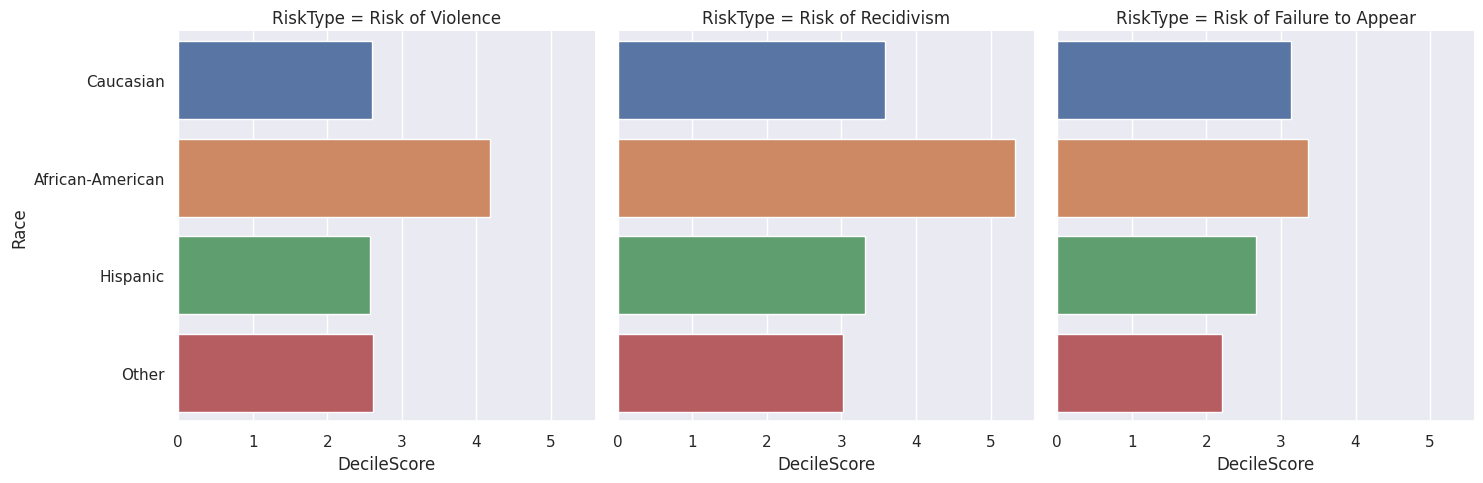

In [ ]:
ax = sns.catplot(x='DecileScore',y='Race', col='RiskType', data=df, kind='bar', ci=False, orient='h')
ax

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

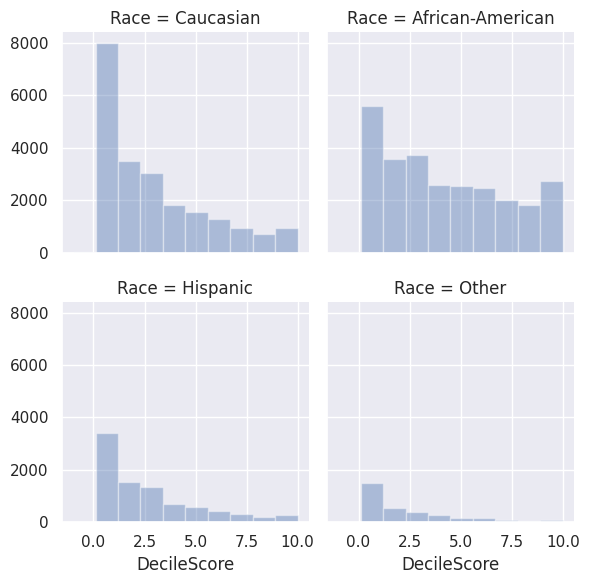

In [ ]:
#distribution of decile scores across all races
#can see that african americans have the most evenly distributed decile scores
g = sns.FacetGrid(df, col='Race', col_wrap=2)
g = g.map(sns.distplot, 'DecileScore', kde=False, bins=10)

**Hypothesis Test 1**

Question: Do African-Americans receive higher scores for recidivism than caucasians?

In [ ]:
african_american = df[df.Race == 'African-American']
caucasian = df[df.Race == 'Caucasian']
african_american_scores = african_american['DecileScore']
caucasian_scores = caucasian['DecileScore']

In [ ]:
african_american_scores.describe()

count    27069.000000
mean         4.291773
std          2.767021
min         -1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         10.000000
Name: DecileScore, dtype: float64

In [ ]:
caucasian_scores.describe()

count    21783.000000
mean         3.108250
std          2.401878
min         -1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         10.000000
Name: DecileScore, dtype: float64

In [ ]:
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats

In [ ]:
tstat, pvalue, ddof = ttest_ind(
                                african_american_scores,
                                caucasian_scores,
                                alternative="larger",
                                usevar="pooled"
)

In [ ]:
print(pvalue)

0.0


**P-value of 0, so we can reject the null hypothesis and accept the statistically proven hypothesis that African Americans receive higher scores for recidivism than Caucasians**

**Recommended Supervision Level**

In [ ]:
#race vs recommended supervision level
df.groupby('Race')['RecSupervisionLevel'].mean()

Race
African-American    1.943145
Caucasian           1.406418
Hispanic            1.334935
Other               1.314866
Name: RecSupervisionLevel, dtype: float64

<ipython-input-33-dd8ed6a5da58>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.catplot(x='RecSupervisionLevel',y='Race', data=df, kind='bar', ci=False, orient='h')


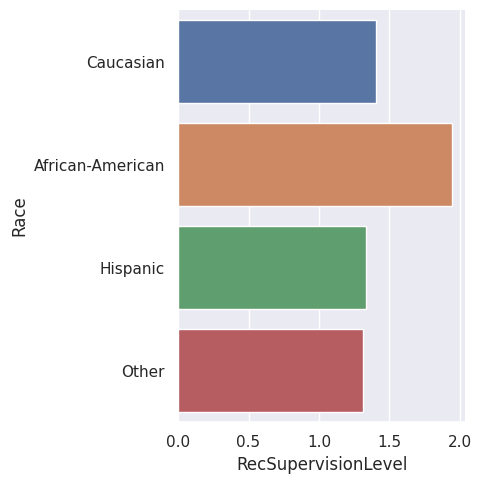

In [ ]:
ax = sns.catplot(x='RecSupervisionLevel',y='Race', data=df, kind='bar', ci=False, orient='h')

**Hypothesis Test 2**

Question: Do African-Americans receive higher recommended supervision levels than caucasians?

In [ ]:
african_american = df[df.Race == 'African-American']
caucasian = df[df.Race == 'Caucasian']
african_american_lvl = african_american['RecSupervisionLevel']
caucasian_lvl = caucasian['RecSupervisionLevel']

In [ ]:
african_american_lvl.describe()

count    27069.000000
mean         1.943145
std          1.054442
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: RecSupervisionLevel, dtype: float64

In [ ]:
caucasian_lvl.describe()

count    21783.000000
mean         1.406418
std          0.773997
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: RecSupervisionLevel, dtype: float64

In [ ]:
tstat, pvalue, ddof = ttest_ind(
                                african_american_lvl,
                                caucasian_lvl,
                                alternative="larger",
                                usevar="pooled"
)

In [ ]:
print(pvalue)

0.0


**P-value of 0, so we can reject the null hypothesis and accept the statistically proven hypothesis that African Americans receive higher recommended supervision levels than Caucasians.**

**Linear Regression Model on compas-scores-raw**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
numerical_data = df.select_dtypes(np.number).fillna(0).drop(columns='Person_ID')
numerical_data.head()

,RecSupervisionLevel,Scale_ID,RawScore,DecileScore
0,1,7,-2.08,4
1,1,8,-1.06,2
2,1,18,15.00,1
3,1,7,-2.84,2
4,1,8,-1.50,1


In [ ]:
target_variable = 'DecileScore'
independent_variables = numerical_data.drop(columns = target_variable).columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     numerical_data[independent_variables],   # X
     numerical_data[target_variable], # y
     test_size=0.2,   # % of the data that goes to the test dataset
     random_state=13   # ensure reproductibility
)

In [ ]:
print('X train', X_train.shape)
print('y train', y_train.shape)
print('X test', X_test.shape)
print('y test', y_test.shape)

X train (48674, 3)
y train (48674,)
X test (12169, 3)
y test (12169,)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
X = X_test.reset_index().copy()
X["DecileScore"] = y_test.tolist()
X["prediction"] = predictions
X.head()

,index,RecSupervisionLevel,Scale_ID,RawScore,DecileScore,prediction
0,2591,2,18,23.00,5,5.438777
1,21425,2,18,23.00,5,5.438777
2,49445,1,18,25.00,6,4.787859
3,18533,1,18,16.00,2,1.295476
4,39270,1,7,-2.32,3,3.013617


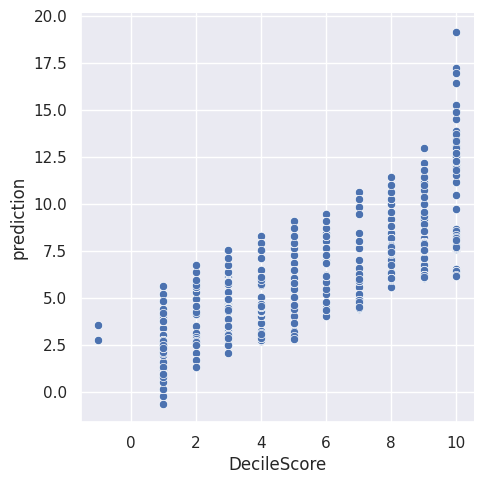

In [ ]:
sns.relplot(x="DecileScore", y="prediction", data=X, kind="scatter")

In [ ]:
#cross validate our model, mae is low showing the model is accurate
from sklearn.model_selection import cross_val_score
results_cross_validation = cross_val_score(
    estimator=model,
    X=numerical_data[independent_variables],
    y=numerical_data[target_variable],
    scoring="neg_mean_absolute_error",
    cv=5,
)
print(abs(results_cross_validation).mean())

1.2295096272589396
